# Create and run a local RAG Pipeline from scratch

## What is RAG?

RAG stands for Retrieval Augmented Generation.

The goal of RAG is to take information and pass it to an LLM so it can generate outputs bases on that information

* Retrieval - Find relevant information given a query, eg : "What are macroneutrients and what do they do?" --> retrieves passages of text related to macronutrients from a nutrition textbook
* Augmented - We want to take the relevant information and augment our input (prompt) to an LLM with that relevant information.
* Generation - Take the first two steps and pass them to an LLM for generative output

## Why RAG?

The main goal of RAG is to improve the generation output of LLMs.

1. Prevent hallucinations - LLMs are incredibly good at generating good *looking* text, however, this text doesn't mean that it's factual. RAG can help LLMs generate information based on relevant passages that are factual.
2. Work with custom data - Many base LLMs are trained with internet-scaled data. They have a fairly good understanding of language in general. However, it also does a lot of their responses can be generic in nature. RAG helps to create specific responses based on specific documents (eg. your own companies customer support documents)


## What can be RAG used for?

* Customer support Q&A chat - Treat your existing customer support documents as a resource and when a customer asks a question, you could have a retrieval system, retrieve relevant documentation snippets and then have an LLM craft those snippets into an answer. Think of this as a "chatbot for your documentation".
* Email chain analysis - You're a large insurance company and you have chains and chains of emails of customer claims. You could use a RAG pipeline to find relevant information from those emails and then use LLM to process that information into structed data.
* Company internal documentation chat
* Textbook Q&A - You're a nutrion student and you've got a 1200 textbook page to read, you can read a RAG pipeline to go through the textbook and find relevant passages to the questions you have.

Common theme here: take your relevant documents to a query and process them with an LLM

*You can consider an LLM as a calculator for words*

## Why locally?

Fun.

Privacy, speed, cost

* Privacy - If you have private documentation, you dont want to send it to an API. You want to setup and LLM and run it on your own hardware.
* Speed - Whenever you use an API, you have to send some kind of data across the internet. This takes time. Running locally means we dont have to wait for transfers of the data.
* Cost - If you own your hardware, the cost is paid. It may have a large cost to begin with. But overtime, you dont have to keep paying for API fees.
* No vendor lockin - If you run own software/hardware. If OpenAI/another large internet company shut down tomorrow, you can still run your business.

## What we're going to build

* https://github.com/mrdbourke/simple-local-rag
* https://whimsical.com/simple-local-rag-workflow-39kToR3yNf7E8kY4sS2tjV

## Key terms - 

* <b>Token</b> - A sub-word piece of text. For example, "hello, world!" could be split into ["hello", ",", "world", "!"]. A token can be a whole word,
part of a word or group of punctuation characters. 1 token ~= 4 characters in English, 100 tokens ~= 75 words.
Text gets broken into tokens before being passed to an LLM.

* <b>Embedding</b> - A learned numerical representation of a piece of data. For example, a sentence of text could be represented by a vector with 768 values. Similar pieces of text (in meaning) will ideally have similar values.

* <b> Embedding model</b> - A model designed to accept input data and output a numerical representation. For example, a text embedding model may take in 384 tokens of text and turn it into a vector of size 768. An embedding model can and often is different to an LLM model.

* <b>Similarity search/vector search</b> - Similarity search/vector search aims to find two vectors which are close together in high-demensional space. For example, two pieces of similar text passed through an embedding model should have a high similarity score, whereas two pieces of text about different topics will have a lower similarity score. Common similarity score measures are dot product and cosine similarity.

* <b>Large Language Model (LLM)</b> - A model which has been trained to numerically represent the patterns in text. A generative LLM will continue a sequence when given a sequence. For example, given a sequence of the text "hello, world!", a genertive LLM may produce "we're going to build a RAG pipeline today!". This generation will be highly dependant on the training data and prompt.

* <b>LLM context window</b> - The number of tokens a LLM can accept as input. For example, as of March 2024, GPT-4 has a default context window of 32k tokens (about 96 pages of text) but can go up to 128k if needed. A recent open-source LLM from Google, Gemma (March 2024) has a context window of 8,192 tokens (about 24 pages of text). A higher context window means an LLM can accept more relevant information to assist with a query. For example, in a RAG pipeline, if a model has a larger context window, it can accept more reference items from the retrieval system to aid with its generation.

* <b>Prompt</b> - A common term for describing the input to a generative LLM. The idea of "prompt engineering" is to structure a text-based(or potentially image-based as well) input to a generative LLM in a specific way so that the generated output is ideal. This technique is
possible because of a LLMs capacity for in-context learning, as in, it is able to use its representation of language to breakdown the prompt and recognize what a suitable output may be (note: the output of LLMs is probable, so terms like "may output" are used).




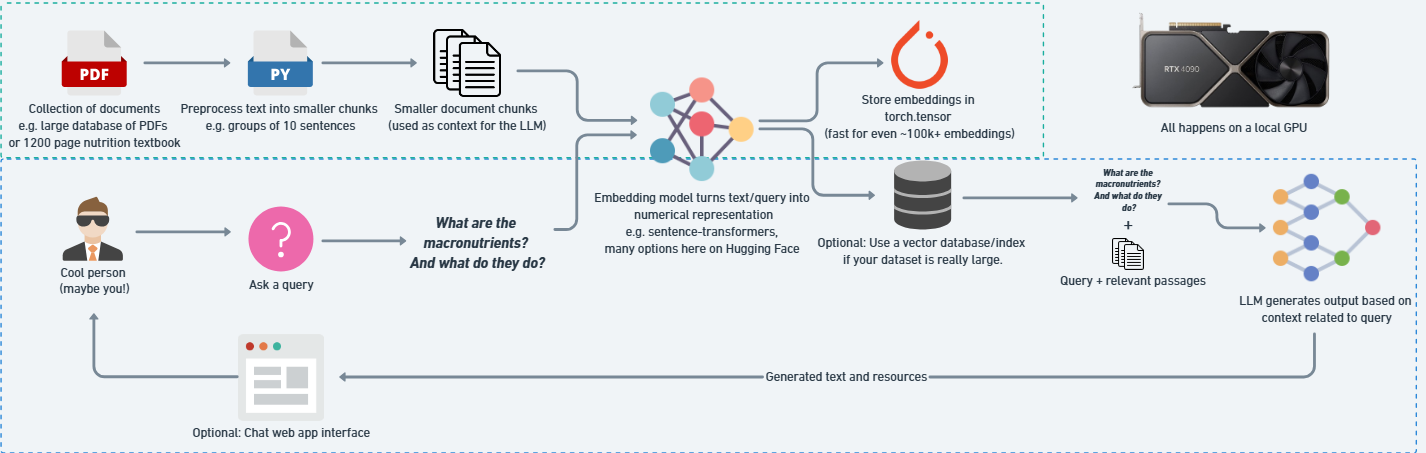

### We're going to build a NutriChat to "chat with a nutrition textbook".

Specifically : 

1. Open a PDF document (can use any PDF here or even a collection of PDF's)
2. Format the text of the PDF textbook ready for an embedding model
3. Embed all of the chunks of text in the textbook and turn into numerical representation (embedding) which can store for later.
4. Build a retrieval system that uses vector search to find relevant chunk of text based on a query.
5. Create a prompt that incorporates the retrieved pieces of text.
6. Generate an answer to a query based on the passages of the textbook with an LLM

All locally!

1. Steps 1-3 : Document Preprocessing and embedding creation
2. Steps 4-6 : Search and answer

In [ ]:
## 1. Document/text processing and embedding creation